# Getting $g_{bar}$ vs $g_{obs}$

Users are assumed to have read the two tutorials on getting $g_{bar}$ and $g_{obs}$, so most of this code is uncommented. The only differences between those tutorials and what is written here is that no "Retrieval" chunck is included in this section and the "checking plots" are skipped.

## Setup

In [3]:
import mond_project as mp
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle as pk
import pandas as pd

## Extracting $g_{bar}$ and $g_{obs}$

Here we construct 'gobs' and 'gbar'. These are lists of pandas.DataFrame elements containing g_obs and g_bar values for 100 different Illustris-1 galaxies. Each element corresponds to a radius (of bin size 1 kpc) between 5 kpc and 50 kpc and the values contained are the g_obs or g_bar values for each galaxy at the given radius.

In [4]:
gobs = []
gbar = []

init_r = 1
final_r = 60 
bin_size = 1 

for radius in range(init_r, final_r, bin_size):
    elem_obs = mp.calc_gobs(radius, bin_size, os.path.join('halo_saves', 'subhalo_list.npz'))
    elem_bar = mp.calc_gbar(radius, bin_size, os.path.join('halo_saves', 'subhalo_list.npz'))
    
    gobs.append(elem_obs)
    gbar.append(elem_bar)
    print('Finished Radius '+str(radius)+' kpc', end = '\r')
    
print('Done!                                         ')

Done!                                         


## Calculating Average $g_{obs}$ and $g_{bar}$

This is a combination of both 'Calculation' segments of the other two tutorials.

In [5]:
id_list = list(gbar[0])

g_obs_r = {}
g_bar_r = {}

for r in range(init_r, final_r, bin_size):
    galaxy_list_obs = []
    galaxy_list_bar = []
    
    for id in id_list:
        galaxy_list_obs.append(gobs[r-init_r].at[r,id])
        galaxy_list_bar.append(gbar[r-init_r].at[r,id])
        
    g_obs_r[r] = galaxy_list_obs
    g_bar_r[r] = galaxy_list_bar
    
avg_gobs = {}
avg_gbar = {}

for r in range(init_r, final_r, bin_size):
    avg_gobs[r] = np.nansum(g_obs_r[r])/(len(g_obs_r[r]) - np.count_nonzero(np.isnan(g_obs_r[r])))
    avg_gbar[r] = np.nansum(g_bar_r[r])/(len(g_bar_r[r]) - np.count_nonzero(np.isnan(g_bar_r[r])))

## Plotting $g_{obs}$ vs $g_{bar}$

Here we plot our average $g_{obs}$ data against our $g_{bar}$ data to get the proper $g_{obs}-g_{bar}$ plot.

/home/mlschott343/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


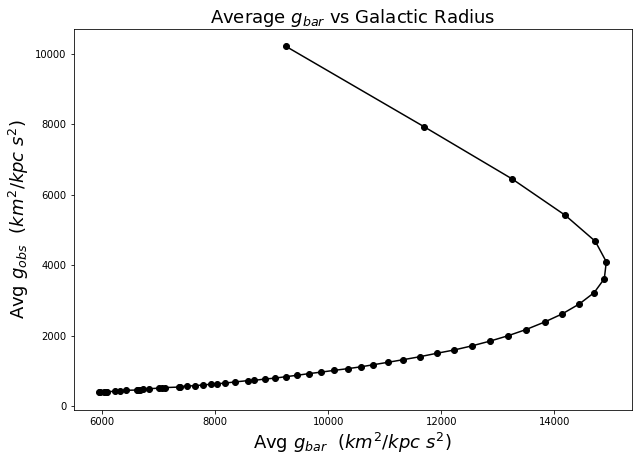

In [9]:
x = [x for x in avg_gbar.values()]
y = [y for y in avg_gobs.values()]

font_size = 18
fig = plt.figure(1,figsize = (10,7))
plt.plot(x[2:], y[2:], color = 'black', marker = 'o')
ax = plt.axes()
ax.set_xlabel('Avg $g_{bar}$  ($km^2/kpc \ s^2$)', fontsize = font_size)
ax.set_ylabel('Avg $g_{obs}$  ($km^2/kpc \ s^2$)', fontsize = font_size)
ax.set_title('Average $g_{bar}$ vs Galactic Radius', fontsize = font_size)

plt.savefig('avg_gobs_v_gbar_2.png')

It should be noted that, upon point-by-point inspection, the "tail" around (7000,500) does not flip back over itself. By this I mean that the increased density of points is just consequential to a slower change in value and not due to the curve having reached a minimum and doubled-back on itself.

## Plotting with Fitting

Here we use the fitting function $$g_{obs} = \frac{g_{bar}}{1-e^{-\sqrt{g_{bar} \ /\ g^\dagger}}}$$ to compare LCDM with MOND predictions. In MOND $g^\dagger \equiv a_{0}$.

/home/mlschott343/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Average $g_{bar}$ vs Galactic Radius')

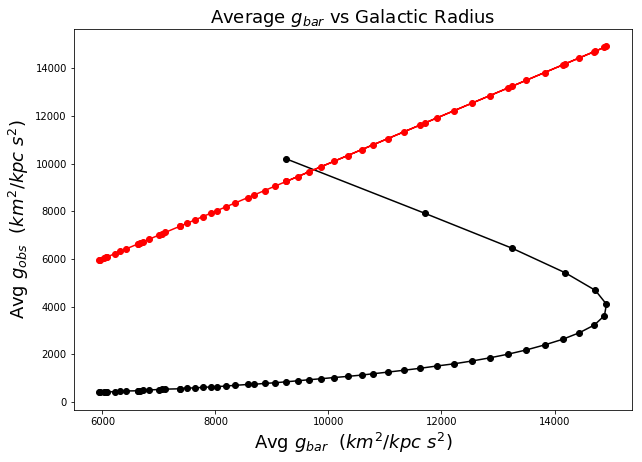

In [19]:
g_dagger = 1

fit = [g_bar/(1-np.e**(-np.sqrt(g_bar/g_dagger))) for g_bar in avg_gbar.values()]

x = [x for x in avg_gbar.values()]
y = [y for y in avg_gobs.values()]

font_size = 18
fig = plt.figure(1,figsize = (10,7))
plt.plot(x[2:], y[2:], color = 'black', marker = 'o')
plt.plot(x[2:], fit[2:], color = 'red', marker = 'o')
ax = plt.axes()
ax.set_xlabel('Avg $g_{bar}$  ($km^2/kpc \ s^2$)', fontsize = font_size)
ax.set_ylabel('Avg $g_{obs}$  ($km^2/kpc \ s^2$)', fontsize = font_size)
ax.set_title('Average $g_{bar}$ vs Galactic Radius', fontsize = font_size)
